In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [8]:
boston.data.shape

(506L, 13L)

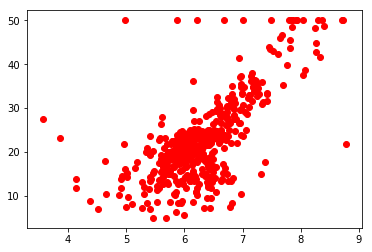

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(boston.data[:, 5], boston.target, color='r')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
x = boston.data[:, 5]
y = boston.target
import numpy as np
x = np.transpose(np.atleast_2d(x))

lr.fit(x, y)
y_predicted = lr.predict(x)

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_predicted)
mse

43.600551771169563

In [16]:
rmse = np.sqrt(mse)
rmse

6.6030713892225608

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_predicted)
r2

0.48352545599133423

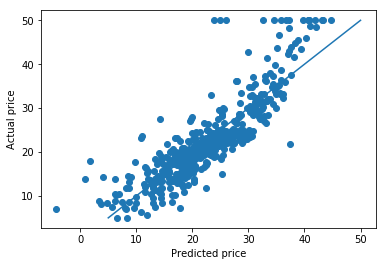

In [21]:
x = boston.data
y = boston.target
lr.fit(x, y)
p = lr.predict(x)
plt.scatter(p, y)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.plot([y.min(), y.max()], [[y.min()], [y.max()]])
plt.show()

In [26]:
from sklearn.cross_validation import KFold
kf = KFold(len(x), n_folds=5)
p = np.zeros_like(y)

for train, test in kf:
    lr.fit(x[train], y[train])
    p[test] = lr.predict(x[test])
    
rmse_cv = np.sqrt(mean_squared_error(y, p))
rmse_cv

6.097044039669913

# P greater than N example

In [13]:
from sklearn.datasets import load_svmlight_file
import os
data, target = load_svmlight_file(os.path.join(os.getcwd(), 'ch07\\data\\E2006.train'))

## OLS

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()

lr.fit(data, target)
pred = lr.predict(data)

rmse_train = np.sqrt(mean_squared_error(target, pred))
r2 = r2_score(target, pred)
print(rmse_train)
print(r2)

0.00238297744011
0.999985795589


In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import KFold
met = ElasticNet(alpha=0.1)

kf = KFold(len(target), n_folds=5)
p = np.zeros_like(target)

for train, test in kf:
    met.fit(data[train], target[train])
    p[test] = met.predict(data[test])

print('rmse:' + str(np.sqrt(mean_squared_error(target, p))))
print('r2:' + str(r2_score(target, p)))

rmse:0.396742077005
r2:0.606268739456


In [31]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

met = ElasticNetCV(n_jobs=-1)

kf = KFold(len(target), n_folds=5)
p = np.zeros_like(target)
for train, test in kf:
    met.fit(data[train], target[train])
    p[test] = met.predict(data[test])
    print('...')
    
r2_cv = r2_score(target, p)
print(r2_cv)

...


...


...


...


...
0.653689239305


In [ ]:
print('dd')